In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import json
import datetime
from dateutil.relativedelta import relativedelta
import gensim
from gensim import corpora, models
from gensim.models import Phrases
import numpy as np
import matplotlib.pyplot as plt
import random
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc

importing IMDB reviews

In [3]:
with open("C:/Users/T430/Desktop/jupyter_notebook/aclImdb/train-pos.txt",'r',encoding="utf-8") as infile:
    pos_review=infile.readlines()

In [4]:
len(pos_review)

12500

In [5]:
with open("C:/Users/T430/Desktop/jupyter_notebook/aclImdb/train-neg.txt",'r',encoding="utf-8") as infile:
    neg_review=infile.readlines()

In [6]:
len(neg_review)

12500

let's review text of one of the article

In [7]:
pos_review[0]

'bromwell high is a cartoon comedy .  it ran at the same time as some other programs about school life ,  such as  " teachers "  .  my 35 years in the teaching profession lead me to believe that bromwell high\'s satire is much closer to reality than is  " teachers "  .  the scramble to survive financially ,  the insightful students who can see right through their pathetic teachers\' pomp ,  the pettiness of the whole situation ,  all remind me of the schools i knew and their students .  when i saw the episode in which a student repeatedly tried to burn down the school ,  i immediately recalled  .  .  .  .  .  .  .  .  .  at  .  .  .  .  .  .  .  .  .  .  high .  a classic line :  inspector :  i\'m here to sack one of your teachers .  student :  welcome to bromwell high .  i expect that many adults of my age think that bromwell high is far fetched .  what a pity that it isn\'t ! \n'

In [8]:
total_reviews=pos_review+neg_review

In [12]:
punctuation = """.,?!:;(){}[]"""
for c in punctuation:
    total_reviews = [z.replace(c, ' %s '%c) for z in total_reviews]      
total_reviews[0]    

'bromwell high is a cartoon comedy    .     it ran at the same time as some other programs about school life    ,     such as  " teachers "     .     my 35 years in the teaching profession lead me to believe that bromwell high\'s satire is much closer to reality than is  " teachers "     .     the scramble to survive financially    ,     the insightful students who can see right through their pathetic teachers\' pomp    ,     the pettiness of the whole situation    ,     all remind me of the schools i knew and their students    .     when i saw the episode in which a student repeatedly tried to burn down the school    ,     i immediately recalled     .        .        .        .        .        .        .        .        .     at     .        .        .        .        .        .        .        .        .        .     high    .     a classic line    :     inspector    :     i\'m here to sack one of your teachers    .     student    :     welcome to bromwell high    .     i expect that

In [11]:
word_token=[doc.lower().replace('\n','').replace('<br />','').strip().split() for doc in total_reviews]
word_token[:5]

[['bromwell',
  'high',
  'is',
  'a',
  'cartoon',
  'comedy',
  '.',
  'it',
  'ran',
  'at',
  'the',
  'same',
  'time',
  'as',
  'some',
  'other',
  'programs',
  'about',
  'school',
  'life',
  ',',
  'such',
  'as',
  '"',
  'teachers',
  '"',
  '.',
  'my',
  '35',
  'years',
  'in',
  'the',
  'teaching',
  'profession',
  'lead',
  'me',
  'to',
  'believe',
  'that',
  'bromwell',
  "high's",
  'satire',
  'is',
  'much',
  'closer',
  'to',
  'reality',
  'than',
  'is',
  '"',
  'teachers',
  '"',
  '.',
  'the',
  'scramble',
  'to',
  'survive',
  'financially',
  ',',
  'the',
  'insightful',
  'students',
  'who',
  'can',
  'see',
  'right',
  'through',
  'their',
  'pathetic',
  "teachers'",
  'pomp',
  ',',
  'the',
  'pettiness',
  'of',
  'the',
  'whole',
  'situation',
  ',',
  'all',
  'remind',
  'me',
  'of',
  'the',
  'schools',
  'i',
  'knew',
  'and',
  'their',
  'students',
  '.',
  'when',
  'i',
  'saw',
  'the',
  'episode',
  'in',
  'which',
 

In [10]:
en_stop = get_stop_words('en')
custom_stop=['.',',',':','(',')','{','}','[',']']
en_stop=en_stop+['can','will','shall']+custom_stop
stopped_tokens= [[token for token in doc if not token in en_stop and not token.isdigit()]for doc in word_token]

In [11]:
wnl = WordNetLemmatizer()
texts= [[wnl.lemmatize(token) for token in doc]for doc in stopped_tokens]

In [12]:
bigram = Phrases(texts, min_count=10,threshold=4)
trigram = Phrases(bigram[texts],min_count=10,threshold=4)
texts_1=list(trigram[bigram[texts]])

In [13]:
tf_matrix = defaultdict(int)

## token count in corpus
for text in texts_1:
     for token in text:
         tf_matrix[token] += 1

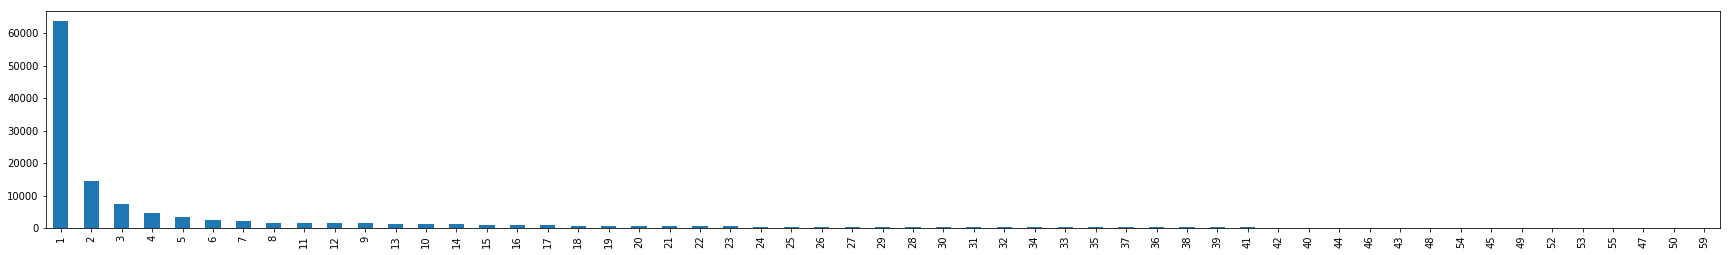

In [14]:
tf_matrix_1=pd.DataFrame(list(tf_matrix.items()), columns=['token', 'count_nos'])
min_freq_plot=tf_matrix_1.count_nos.value_counts().sort_values(ascending=False)
min_freq_plot=min_freq_plot[0:int(.05*min_freq_plot.shape[0])]
plt.subplots(figsize=(30,4))
min_freq_plot.plot.bar()
plt.show()

In [15]:
freq_word=tf_matrix_1.sort_values(by='count_nos',ascending=False)

In [16]:
print(freq_word.shape)
freq_word.head()

(127796, 2)


,token,count_nos
266,movie,42571
185,film,39985
44,one,21526
74,just,15726
54,!,14644


In [17]:
texts_2 = [[token for token in text if tf_matrix[token] > 10 and tf_matrix[token]<22000] for text in texts_1]

In [18]:
tf_matrix_2 = defaultdict(int)

## token count in corpus
for text in texts_2:
     for token in text:
         tf_matrix_2[token] += 1

In [19]:
tf_matrix_2=pd.DataFrame(list(tf_matrix_2.items()), columns=['token', 'count_nos'])
print(tf_matrix_2.shape)

(25161, 2)


In [20]:
min_word_len= [[token for token in doc if len(token)<=2]for doc in texts_2]
tf_matrix_3 = defaultdict(int)

## token count in corpus
for text in min_word_len:
     for token in text:
         tf_matrix_3[token] += 1
tf_matrix_3=pd.DataFrame(list(tf_matrix_3.items()), columns=['token', 'count_nos'])
tf_matrix_3=tf_matrix_3.sort_values(by='count_nos',ascending=False)
print(tf_matrix_3.shape)

(217, 2)


In [21]:
list(tf_matrix_3.token)

['!',
 '?',
 '-',
 ';',
 'go',
 '"',
 '&',
 'u',
 '--',
 'le',
 'mr',
 '\x96',
 'tv',
 'ok',
 'oh',
 "'",
 'dr',
 'us',
 'm',
 'de',
 'b',
 'e',
 '"a',
 'la',
 'dy',
 'v',
 '"i',
 's',
 'c',
 'd',
 '/',
 'uk',
 'r',
 'l',
 'j',
 'p',
 '80',
 't',
 'al',
 'ii',
 'as',
 'o',
 'ad',
 '*',
 'ed',
 '70',
 'g',
 'jr',
 'f',
 'bo',
 'k',
 'x',
 'w',
 'h',
 'n',
 '60',
 'fx',
 'cd',
 '=',
 "'s",
 'ex',
 'cg',
 'st',
 '**',
 'ah',
 'ya',
 '2"',
 'q',
 '–',
 '3d',
 'co',
 '50',
 'hk',
 '$1',
 '~',
 'im',
 '#1',
 'da',
 '+',
 '90',
 'ie',
 "'i",
 '\x97',
 'y',
 '30',
 'uh',
 'sf',
 'id',
 'z',
 'ho',
 'el',
 're',
 'pc',
 'um',
 '40',
 'te',
 'ny',
 'iq',
 'pg',
 'du',
 'et',
 '#2',
 'ma',
 'jo',
 'er',
 "'a",
 'dj',
 'iv',
 'oz',
 '$5',
 'en',
 'lt',
 'ha',
 'pa',
 'un',
 'ta',
 '3"',
 'wb',
 'pb',
 'li',
 'mj',
 'he',
 'ax',
 "o'",
 '$3',
 'wu',
 'di',
 'ca',
 'eg',
 'em',
 'sr',
 'w/',
 'lo',
 'gu',
 'hr',
 '20',
 '$2',
 'th',
 'jj',
 'mc',
 '$',
 "'n",
 '>',
 'b+',
 '$4',
 'eh',
 'sa',
 'dc',

In [22]:
two_len_word=['!','?','go','tv','ok','oh','hr','ah']
texts_3= [[token for token in doc if len(token)>2 or token in two_len_word]for doc in texts_2]

In [23]:
tf_matrix_4 = defaultdict(int)

## token count in corpus
for text in texts_3:
     for token in text:
         tf_matrix_4[token] += 1
tf_matrix_4=pd.DataFrame(list(tf_matrix_4.items()), columns=['token', 'count_nos'])
print(tf_matrix_4.shape)

(24952, 2)


In [24]:
dictionary = corpora.Dictionary(texts_3)
corpus = [dictionary.doc2bow(text) for text in texts_3]
tfidf=models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [25]:
from scipy.sparse import csc_matrix

In [26]:
scipy_csc_matrix = gensim.matutils.corpus2csc(corpus_tfidf)
full_matrix = csc_matrix(scipy_csc_matrix)
full_matrix.shape
DTM=full_matrix.T

In [27]:
dictionary[0]
token_mapping=pd.DataFrame.from_dict(dictionary.id2token,orient='index')
token_mapping.columns=["Token"]

In [28]:
y = np.concatenate((np.ones(len(pos_review)), np.zeros(len(neg_review))))

In [29]:
x_train, x_test, y_train, y_test = train_test_split(DTM, y, test_size=0.2)

In [51]:
model=SGDClassifier(loss='hinge', penalty='l2',max_iter=50,random_state =6)

In [52]:
_=model.fit(x_train,y_train)

In [53]:
train_pred=model.predict(x_train)
accuracy_score(y_train,train_pred)

0.95374999999999999

In [54]:
test_pred=model.predict(x_test)

In [55]:
print("Accuracy")
accuracy_score(y_test,test_pred)

Accuracy


0.89600000000000002

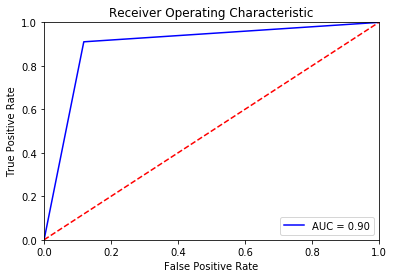

In [56]:
fpr,tpr,_=roc_curve(y_test,test_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()